<a href="https://colab.research.google.com/github/Rdeandres/Game_Analytics_Classification/blob/main/trying_propher_Game_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import itertools as itertools
import numpy as np
from fbprophet import Prophet
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
positive=pd.read_csv('export_dataframe.csv',  sep=',', low_memory=False)
positive = positive.rename(columns={'Date': 'ds', 'Daily Active Users': 'y'})

In [73]:
model1=Prophet(interval_width=0.95) 
# Python

model1.fit(positive)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
future = model1.make_future_dataframe(periods=7)
future.tail()

,ds
140,2021-02-03
141,2021-02-04
142,2021-02-05
143,2021-02-06
144,2021-02-07


In [75]:
forecast = model1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
140,2021-02-03,6167.725625,2409.799520,9581.216460
141,2021-02-04,5823.401084,2297.575700,9176.448158
142,2021-02-05,6338.642864,2787.887311,9529.299409
143,2021-02-06,8707.415873,4996.753212,12244.078087
144,2021-02-07,8877.193490,5089.169700,12653.302556


In [76]:
df=forecast
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          145 non-null    datetime64[ns]
 1   trend                       145 non-null    float64       
 2   yhat_lower                  145 non-null    float64       
 3   yhat_upper                  145 non-null    float64       
 4   trend_lower                 145 non-null    float64       
 5   trend_upper                 145 non-null    float64       
 6   additive_terms              145 non-null    float64       
 7   additive_terms_lower        145 non-null    float64       
 8   additive_terms_upper        145 non-null    float64       
 9   weekly                      145 non-null    float64       
 10  weekly_lower                145 non-null    float64       
 11  weekly_upper                145 non-null    float64       

In [83]:
start_date = "2021-02-01"
end_date = "2021-02-07"

after_start_date = df["ds"] >= start_date
before_end_date = df["ds"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df.loc[between_two_dates]
filtered_dates.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
140,2021-02-03,6939.535153,2409.799520,9581.216460,6782.850859,7111.684198,-771.809528,-771.809528,-771.809528,-771.809528,-771.809528,-771.809528,0.0,0.0,0.0,6167.725625
141,2021-02-04,6923.065033,2297.575700,9176.448158,6688.878858,7178.221394,-1099.663949,-1099.663949,-1099.663949,-1099.663949,-1099.663949,-1099.663949,0.0,0.0,0.0,5823.401084
142,2021-02-05,6906.594913,2787.887311,9529.299409,6597.732267,7264.518033,-567.952049,-567.952049,-567.952049,-567.952049,-567.952049,-567.952049,0.0,0.0,0.0,6338.642864
143,2021-02-06,6890.124792,4996.753212,12244.078087,6456.352685,7350.961523,1817.291081,1817.291081,1817.291081,1817.291081,1817.291081,1817.291081,0.0,0.0,0.0,8707.415873
144,2021-02-07,6873.654672,5089.169700,12653.302556,6356.628680,7467.053885,2003.538818,2003.538818,2003.538818,2003.538818,2003.538818,2003.538818,0.0,0.0,0.0,8877.193490


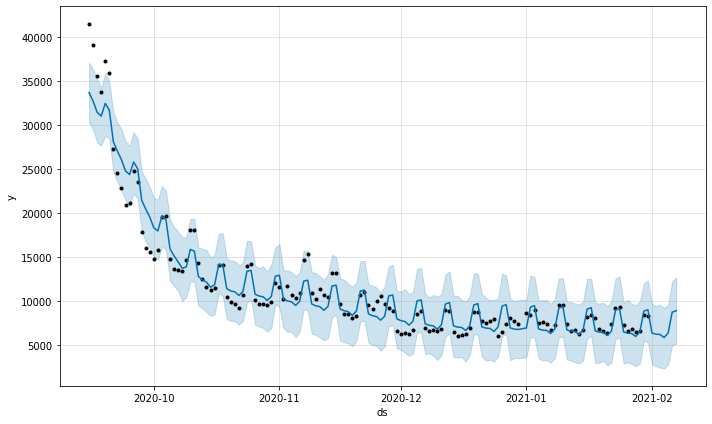

In [84]:
fig1 = model1.plot(forecast)


In [99]:
test=pd.read_csv('test_dataframe.csv',  sep=',', low_memory=False)
test = test.rename(columns={'Date': 'ds', 'Daily Active Users': 'y'})


test.tail()


,ds,y
2,2021-02-03,5895.0
3,2021-02-04,5558.0
4,2021-02-05,6094.0
5,2021-02-06,8343.0
6,2021-02-07,8747.0


In [97]:
test.head()

0    True
1    True
2    True
3    True
4    True
Name: ds, dtype: bool

In [87]:
from sklearn.metrics import mean_squared_error, r2_score

In [100]:
rmse = np.sqrt(mean_squared_error(test['y'],filtered_dates['yhat']))
r2 = r2_score(test['y'],filtered_dates['yhat'])
print(rmse)
print(r2)

260.0679690624583
0.9487418215131233


In [104]:
print(filtered_dates['yhat'])

138    6343.716264
139    6203.360031
140    6167.725625
141    5823.401084
142    6338.642864
143    8707.415873
144    8877.193490
Name: yhat, dtype: float64


first approach without tunning model not bad


In [101]:

# Python
# available holidays countries
#https://github.com/dr-prodigy/python-holidays

model2=Prophet(interval_width=0.95) 

model2.add_country_holidays(country_name='US')
model2.fit(positive)
# List the holiday names
model2.train_holiday_names

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0                  New Year's Day
1      Martin Luther King Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5     Independence Day (Observed)
6                       Labor Day
7                    Columbus Day
8                    Veterans Day
9                    Thanksgiving
10                  Christmas Day
11      New Year's Day (Observed)
12       Christmas Day (Observed)
dtype: object

In [102]:
forecast2 = model2.predict(future)

start_date = "2021-02-01"
end_date = "2021-02-07"

after_start_date = forecast2["ds"] >= start_date
before_end_date = forecast2["ds"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates2 = forecast2.loc[between_two_dates]
filtered_dates2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),Christmas Day (Observed)_lower,Christmas Day (Observed)_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Independence Day,Independence Day_lower,Independence Day_upper,Independence Day (Observed),Independence Day (Observed)_lower,Independence Day (Observed)_upper,Labor Day,Labor Day_lower,Labor Day_upper,Martin Luther King Jr. Day,Martin Luther King Jr. Day_lower,Martin Luther King Jr. Day_upper,Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,New Year's Day (Observed),New Year's Day (Observed)_lower,New Year's Day (Observed)_upper,Thanksgiving,Thanksgiving_lower,Thanksgiving_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,Washington's Birthday,Washington's Birthday_lower,Washington's Birthday_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
140,2021-02-03,6968.846308,3282.661993,9537.000798,6829.297942,7147.003059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-817.332750,-817.332750,-817.332750,0.0,0.0,0.0,-817.332750,-817.332750,-817.332750,0.0,0.0,0.0,6151.513558
141,2021-02-04,6955.938067,2623.552353,9390.774611,6747.574645,7211.351367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1202.831246,-1202.831246,-1202.831246,0.0,0.0,0.0,-1202.831246,-1202.831246,-1202.831246,0.0,0.0,0.0,5753.106822
142,2021-02-05,6943.029827,3159.338176,9717.014974,6645.371707,7299.016075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-543.639586,-543.639586,-543.639586,0.0,0.0,0.0,-543.639586,-543.639586,-543.639586,0.0,0.0,0.0,6399.390241
143,2021-02-06,6930.121586,5645.798293,11821.288774,6548.835626,7407.487396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1891.840993,1891.840993,1891.840993,0.0,0.0,0.0,1891.840993,1891.840993,1891.840993,0.0,0.0,0.0,8821.962579
144,2021-02-07,6917.213345,5974.647702,12258.110131,6444.962444,7488.807097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2080.192227,2080.192227,2080.192227,0.0,0.0,0.0,2080.192227,2080.192227,2080.192227,0.0,0.0,0.0,8997.405572


In [103]:
rmse = np.sqrt(mean_squared_error(test['y'],filtered_dates2['yhat']))
r2 = r2_score(test['y'],filtered_dates2['yhat'])
print(rmse)
print(r2)
#works less well

299.9243228561109
0.9318269364480813


rubbish

trying with cost regressor


In [106]:
positive=pd.read_csv('export_dataframe.csv',  sep=',', low_memory=False)
positive = positive.rename(columns={'Date': 'ds', 'Daily Active Users': 'y'})
positive.head()

,ds,y,Cost
0,2020-09-15,41507.0,5257.05
1,2020-09-16,39049.0,4365.45
2,2020-09-17,35518.0,3565.75
3,2020-09-18,33786.0,2891.40
4,2020-09-19,37254.0,2732.50


In [144]:
#creating future values for Cost


future_range = pd.date_range('2021-02-01', periods=7, freq='D')
Cost_df = pd.DataFrame({ 'ds': future_range, 'Cost' : 0})
Cost_df['ds'] = pd.to_datetime(Cost_df['ds'])
Cost_df = Cost_df.set_index('ds')
Cost_df.at['2021-02-01', 'Cost'] = 659.0500000000096
Cost_df.at['2021-02-02', 'Cost'] = 728.5700000000085
Cost_df.at['2021-02-03', 'Cost'] = 445.5000000000036
Cost_df.at['2021-02-04', 'Cost'] = 426.5500000000038
Cost_df.at['2021-02-05', 'Cost'] = 493.80000000000496
Cost_df.at['2021-02-06', 'Cost'] = 636.2200000000068
Cost_df.at['2021-02-07', 'Cost'] = 989.3000000000139

Cost_df.tail(10)


,Cost
ds,
2021-02-01,659.05
2021-02-02,728.57
2021-02-03,445.50
2021-02-04,426.55
2021-02-05,493.80
2021-02-06,636.22
2021-02-07,989.30


In [145]:
m = Prophet()
m.add_regressor('Cost')
m.fit(positive)

future = m.make_future_dataframe(periods=7)
future=pd.merge(future,Cost_df, on='ds')
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,Cost
2,2021-02-03,445.50
3,2021-02-04,426.55
4,2021-02-05,493.80
5,2021-02-06,636.22
6,2021-02-07,989.30


In [146]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
0,2021-02-01,5619.388767,4409.522167,6912.530491
1,2021-02-02,6570.696262,5341.137567,7798.077281
2,2021-02-03,5691.495634,4474.715507,6906.797046
3,2021-02-04,5564.888272,4354.718327,6816.874210
4,2021-02-05,6466.421881,5270.482259,7625.083944
5,2021-02-06,8825.572849,7595.269536,10057.086440
6,2021-02-07,9739.090982,8560.628819,10906.065661


In [147]:
rmse = np.sqrt(mean_squared_error(test['y'],forecast ['yhat']))
r2 = r2_score(test['y'],forecast ['yhat'])
print(rmse)
print(r2)

595.6218344311877
0.7311372376551595


increasing cost


In [148]:
#creating future values for Cost


future_range = pd.date_range('2021-02-01', periods=7, freq='D')
Cost_df = pd.DataFrame({ 'ds': future_range, 'Cost' : 0})
Cost_df['ds'] = pd.to_datetime(Cost_df['ds'])
Cost_df = Cost_df.set_index('ds')
Cost_df.at['2021-02-01', 'Cost'] = 1659.0500000000096
Cost_df.at['2021-02-02', 'Cost'] = 1728.5700000000085
Cost_df.at['2021-02-03', 'Cost'] = 1445.5000000000036
Cost_df.at['2021-02-04', 'Cost'] = 1426.5500000000038
Cost_df.at['2021-02-05', 'Cost'] = 1493.80000000000496
Cost_df.at['2021-02-06', 'Cost'] = 1636.2200000000068
Cost_df.at['2021-02-07', 'Cost'] = 1989.3000000000139

Cost_df.tail(10)

,Cost
ds,
2021-02-01,1659.05
2021-02-02,1728.57
2021-02-03,1445.50
2021-02-04,1426.55
2021-02-05,1493.80
2021-02-06,1636.22
2021-02-07,1989.30


In [149]:
m = Prophet()
m.add_regressor('Cost')
m.fit(positive)

future = m.make_future_dataframe(periods=7)
future=pd.merge(future,Cost_df, on='ds')
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,Cost
2,2021-02-03,1445.50
3,2021-02-04,1426.55
4,2021-02-05,1493.80
5,2021-02-06,1636.22
6,2021-02-07,1989.30


In [150]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
0,2021-02-01,10622.905675,9450.600845,11763.814331
1,2021-02-02,11574.213170,10346.808717,12781.514902
2,2021-02-03,10695.012542,9582.518999,11858.486137
3,2021-02-04,10568.405179,9357.106759,11767.223345
4,2021-02-05,11469.938789,10359.423769,12694.204861
5,2021-02-06,13829.089757,12679.170241,14949.507848
6,2021-02-07,14742.607890,13466.036508,15827.241454
